<a href="https://colab.research.google.com/github/Praveen3ravi/Machine_Learning/blob/main/USL_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K Means Algorithm**

The way kmeans algorithm works is as follows:
  Specify number of clusters K.
  Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
  Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
  Compute the sum of the squared distance between data points and all centroids.
  Assign each data point to the closest cluster (centroid).
  Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

# ***K means on Geyser Eruptions***

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


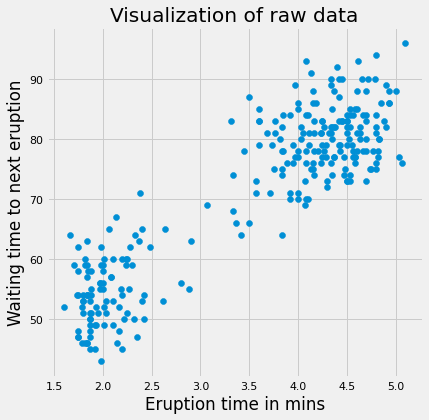

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.read_csv('faithful.csv')

del df['Unnamed: 0']
df

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [2]:
X_std = StandardScaler().fit_transform(df) # standardise data 


km = KMeans(n_clusters=2) # applying k = 2
km.fit(X_std) # fit the data - identify pattern, does everything
centroids = km.cluster_centers_ # final centroid points
km.inertia_ # measures how tight my groups are. lower the better

# # Plot the clustered data
# fig, ax = plt.subplots(figsize=(6, 6))
# plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
#             c='green', label='cluster 1')
# plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
#             c='blue', label='cluster 2')
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
#             c='r', label='centroid')
# plt.legend()
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
# plt.xlabel('Eruption time in mins')
# plt.ylabel('Waiting time to next eruption')
# plt.title('Visualization of clustered data', fontweight='bold')
# ax.set_aspect('equal');

79.57595948827701

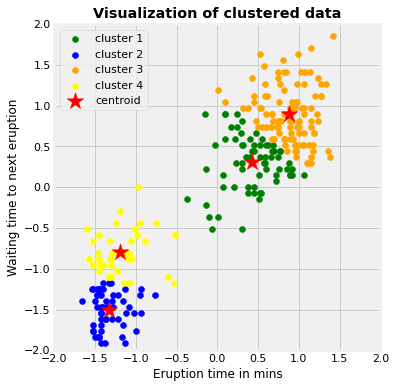

In [3]:
km = KMeans(n_clusters=4) # k = 4
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
plt.scatter(X_std[km.labels_ == 3, 0], X_std[km.labels_ == 3, 1],
            c='yellow', label='cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

# **Impact of initialisation**

80509
37652
68927
66207
46568
97348
72373
96275
99101


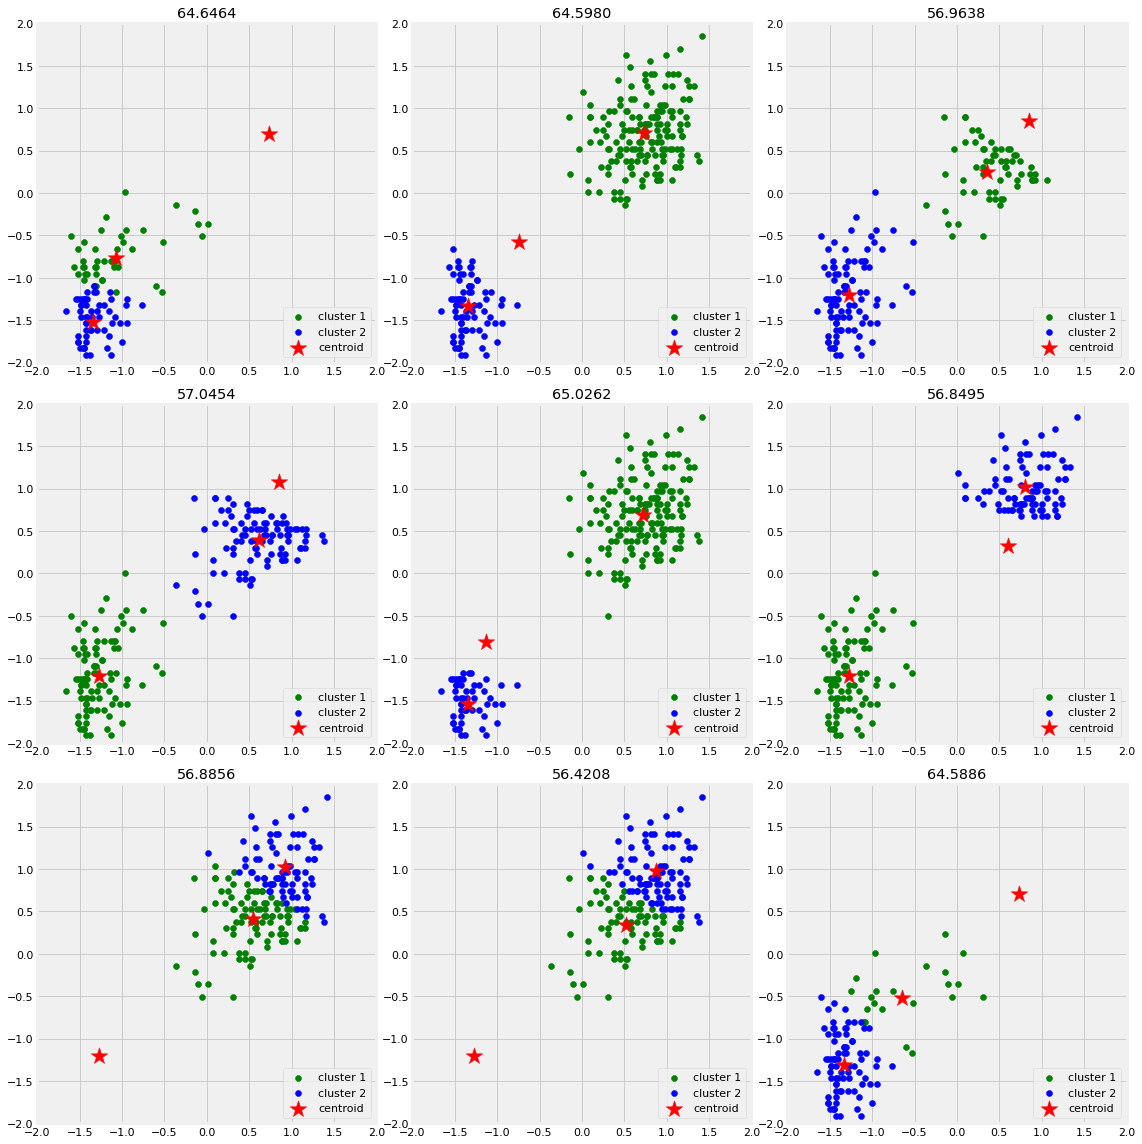

In [4]:
import numpy as np
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    seed = np.random.randint(0, 100000, size=1)[0]
    print(seed)
    km = KMeans(n_clusters=3,max_iter=3,init = 'random',n_init=1,random_state=np.random.RandomState(seed))
    km.fit(X_std)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.inertia_:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();

# **Determining K**

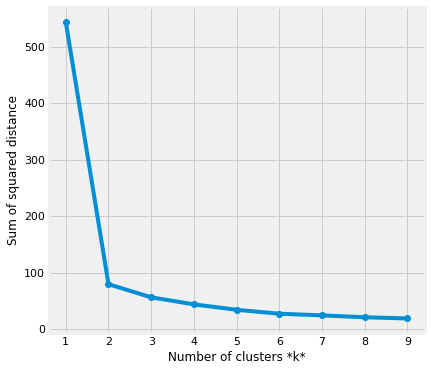

In [5]:
# Elbow plot
# We make a plot between k value and inertia
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

In [6]:
string = "Kmeans"

# **Drawbacks of KMeans**

Does not let the data point far off from each other to be in the same cluster

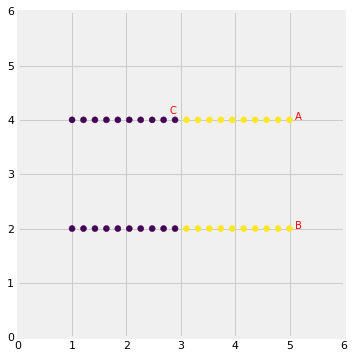

In [7]:
# Create horizantal data
X = np.tile(np.linspace(1, 5, 20), 2)
y = np.repeat(np.array([2, 4]), 20)
df = np.c_[X, y]

km = KMeans(n_clusters=2)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X, y, c=labels)
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.text(5.1, 4, 'A', color='red')
plt.text(5.1, 2, 'B', color='red')
plt.text(2.8, 4.1, 'C', color='red')
ax.set_aspect('equal')

Only can learn spherical clusters

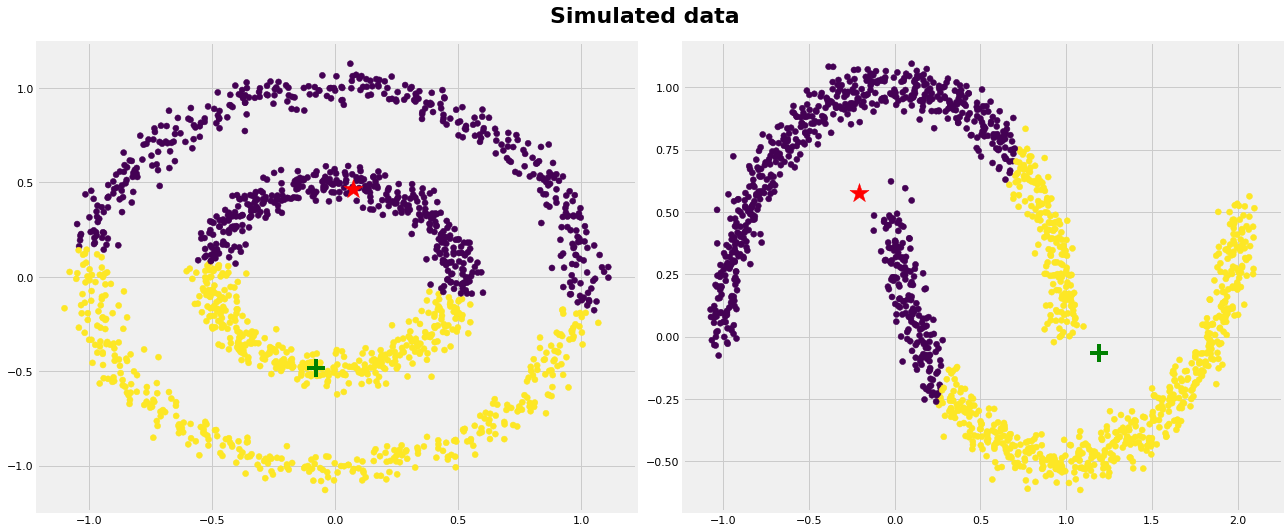

In [8]:
# Cricles
X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    km = KMeans(n_clusters=2)
    km.fit(X[0])
    labels = km.predict(X[0])
    centroids = km.cluster_centers_

    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
    ax[i].scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='r')
    ax[i].scatter(centroids[1, 0], centroids[1, 1], marker='+', s=300, c='green')
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()